# PIMA Indians Diabetes Dataset

## Business Understanding 

Diabetes is the onset and one of the leading diseases in the United States, with 10.5% of the population living with diabetes or pre-diabetes in the country. This figure amounts to 26.8 million diagnosed with diabetes out of a population of 327.2 million. Of that 26.8 million, 14.7% are American Indians/Alaskan Natives. This information is provided in accordance by Diabetes.org

## Data Understanding

In [1]:
#Importing our libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing our dataset

diabetes = pd.read_csv('diabetes.csv')

In [4]:
#We are investigating the dataset to see what columns we have available in our dataset

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


After importing our dataset, the target variable is the Outcome column. This column tells us if the patient has diabetes or not represented by 1.

In [5]:
#Here we will see how many rows and columns of data we have

diabetes.shape

(768, 9)

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#We want to see if there any null values in our dataset

diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As we have seen in our data there are no missing values

In [10]:
#Checking for extraneous values within our dataset

for col in diabetes.columns:
    print(col, '\n', diabetes[col].value_counts(normalize=True).head(), '\n\n')

Pregnancies 
 1    0.175781
0    0.144531
2    0.134115
3    0.097656
4    0.088542
Name: Pregnancies, dtype: float64 


Glucose 
 100    0.022135
99     0.022135
129    0.018229
125    0.018229
111    0.018229
Name: Glucose, dtype: float64 


BloodPressure 
 70    0.074219
74    0.067708
68    0.058594
78    0.058594
72    0.057292
Name: BloodPressure, dtype: float64 


SkinThickness 
 0     0.295573
32    0.040365
30    0.035156
27    0.029948
23    0.028646
Name: SkinThickness, dtype: float64 


Insulin 
 0      0.486979
105    0.014323
140    0.011719
130    0.011719
120    0.010417
Name: Insulin, dtype: float64 


BMI 
 32.0    0.016927
31.6    0.015625
31.2    0.015625
0.0     0.014323
33.3    0.013021
Name: BMI, dtype: float64 


DiabetesPedigreeFunction 
 0.254    0.007812
0.258    0.007812
0.259    0.006510
0.238    0.006510
0.207    0.006510
Name: DiabetesPedigreeFunction, dtype: float64 


Age 
 22    0.093750
21    0.082031
25    0.062500
24    0.059896
23    0.049479
Name:

There are no extraneous variables in our data.

In [11]:
#Checking the types of data 

diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

We can see that we have no object variables therefore no columns within our data need to be converted before we process our Machine Learning models.

In [12]:
#We are going to investigate the variables in the chart that have the strongest correlation with each variable

diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


As we can see in our dataset, the strongest correlating variables are:

- BMI vs Blood Pressure (0.281805)
- Age vs Blood Pressure (0.239528)
- Outcome vs Glucose (0.466581)
- Insulin v Skin Thickness (0.436783)
- BMI v Skin Thickness (0.392573)
- Glucose v Insulin (0.331357)

From these relationships we will utilise the strong four variables and later we will try to find out the strongest indicators in determining whether a patient has diabetes or not.

In [13]:
#We are looking to see how many rows of duplicated data we have

duplicate_rows_diabetes = diabetes[diabetes.duplicated()]

print("The number of duplicate rows are: ", duplicate_rows_diabetes.shape)

The number of duplicate rows are:  (0, 9)


We can see that there are no duplicate rows in our dataset

In [14]:
diabetes.rename(columns = {'BloodPressure':'BP'}, inplace = True)

In [15]:
diabetes.rename(columns = {'SkinThickness':'Skin Thickness','DiabetesPedigreeFunction':'Diabetes Pedigree Function'},
               inplace = True)

Our column variable names are quite cluttered so I am renaming them to make them appear more presentable.

In [16]:
#Checking to see they have been successfully renamed

diabetes.head()

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Visualizations

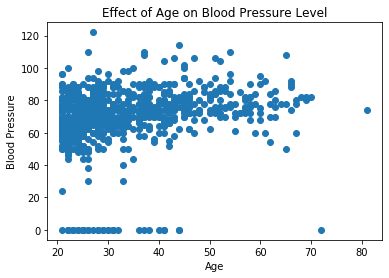

In [17]:
#Here we will create some visualizations of the variables that have the best relationships

#We will display how age has an impact on blood pressure

x = diabetes['Age']
y = diabetes['BP']

plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Effect of Age on Blood Pressure Level')

plt.scatter(x,y)
plt.show()

The plot here doesn't show a very linear relationship between Age and Blood Pressure.

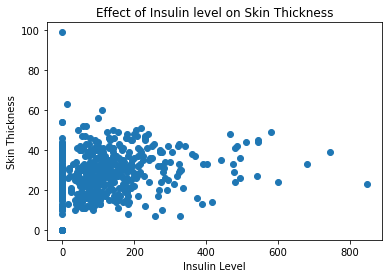

In [18]:
#We will show how insulin has an effect on skin thickness

x1 = diabetes['Insulin']
y1 = diabetes['Skin Thickness']

plt.xlabel('Insulin Level')
plt.ylabel('Skin Thickness')
plt.title('Effect of Insulin level on Skin Thickness')

plt.scatter(x1,y1)
plt.show()

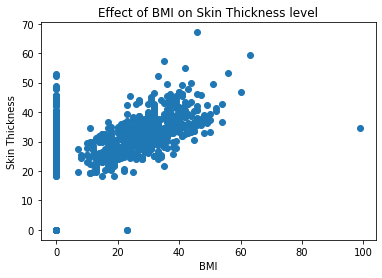

In [19]:
#We will show how level of BMI effects skin thickness 

x2 = diabetes['Skin Thickness']
y2 = diabetes['BMI']

plt.xlabel('BMI')
plt.ylabel('Skin Thickness')
plt.title('Effect of BMI on Skin Thickness level')

plt.scatter(x2,y2)
plt.show()

We can see that there is a linear relationship with BMI and skin thickness

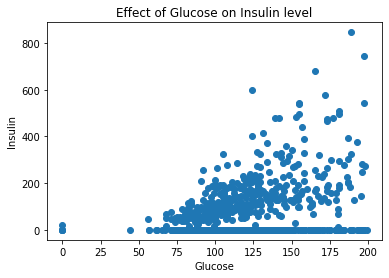

In [20]:
#We are going to show the effect of Glucose on Insulin

x3 = diabetes['Glucose']
y3 = diabetes['Insulin']

plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.title("Effect of Glucose on Insulin level")

plt.scatter(x3,y3)
plt.show()

We can see a linear relationship between Glucose and Insulin

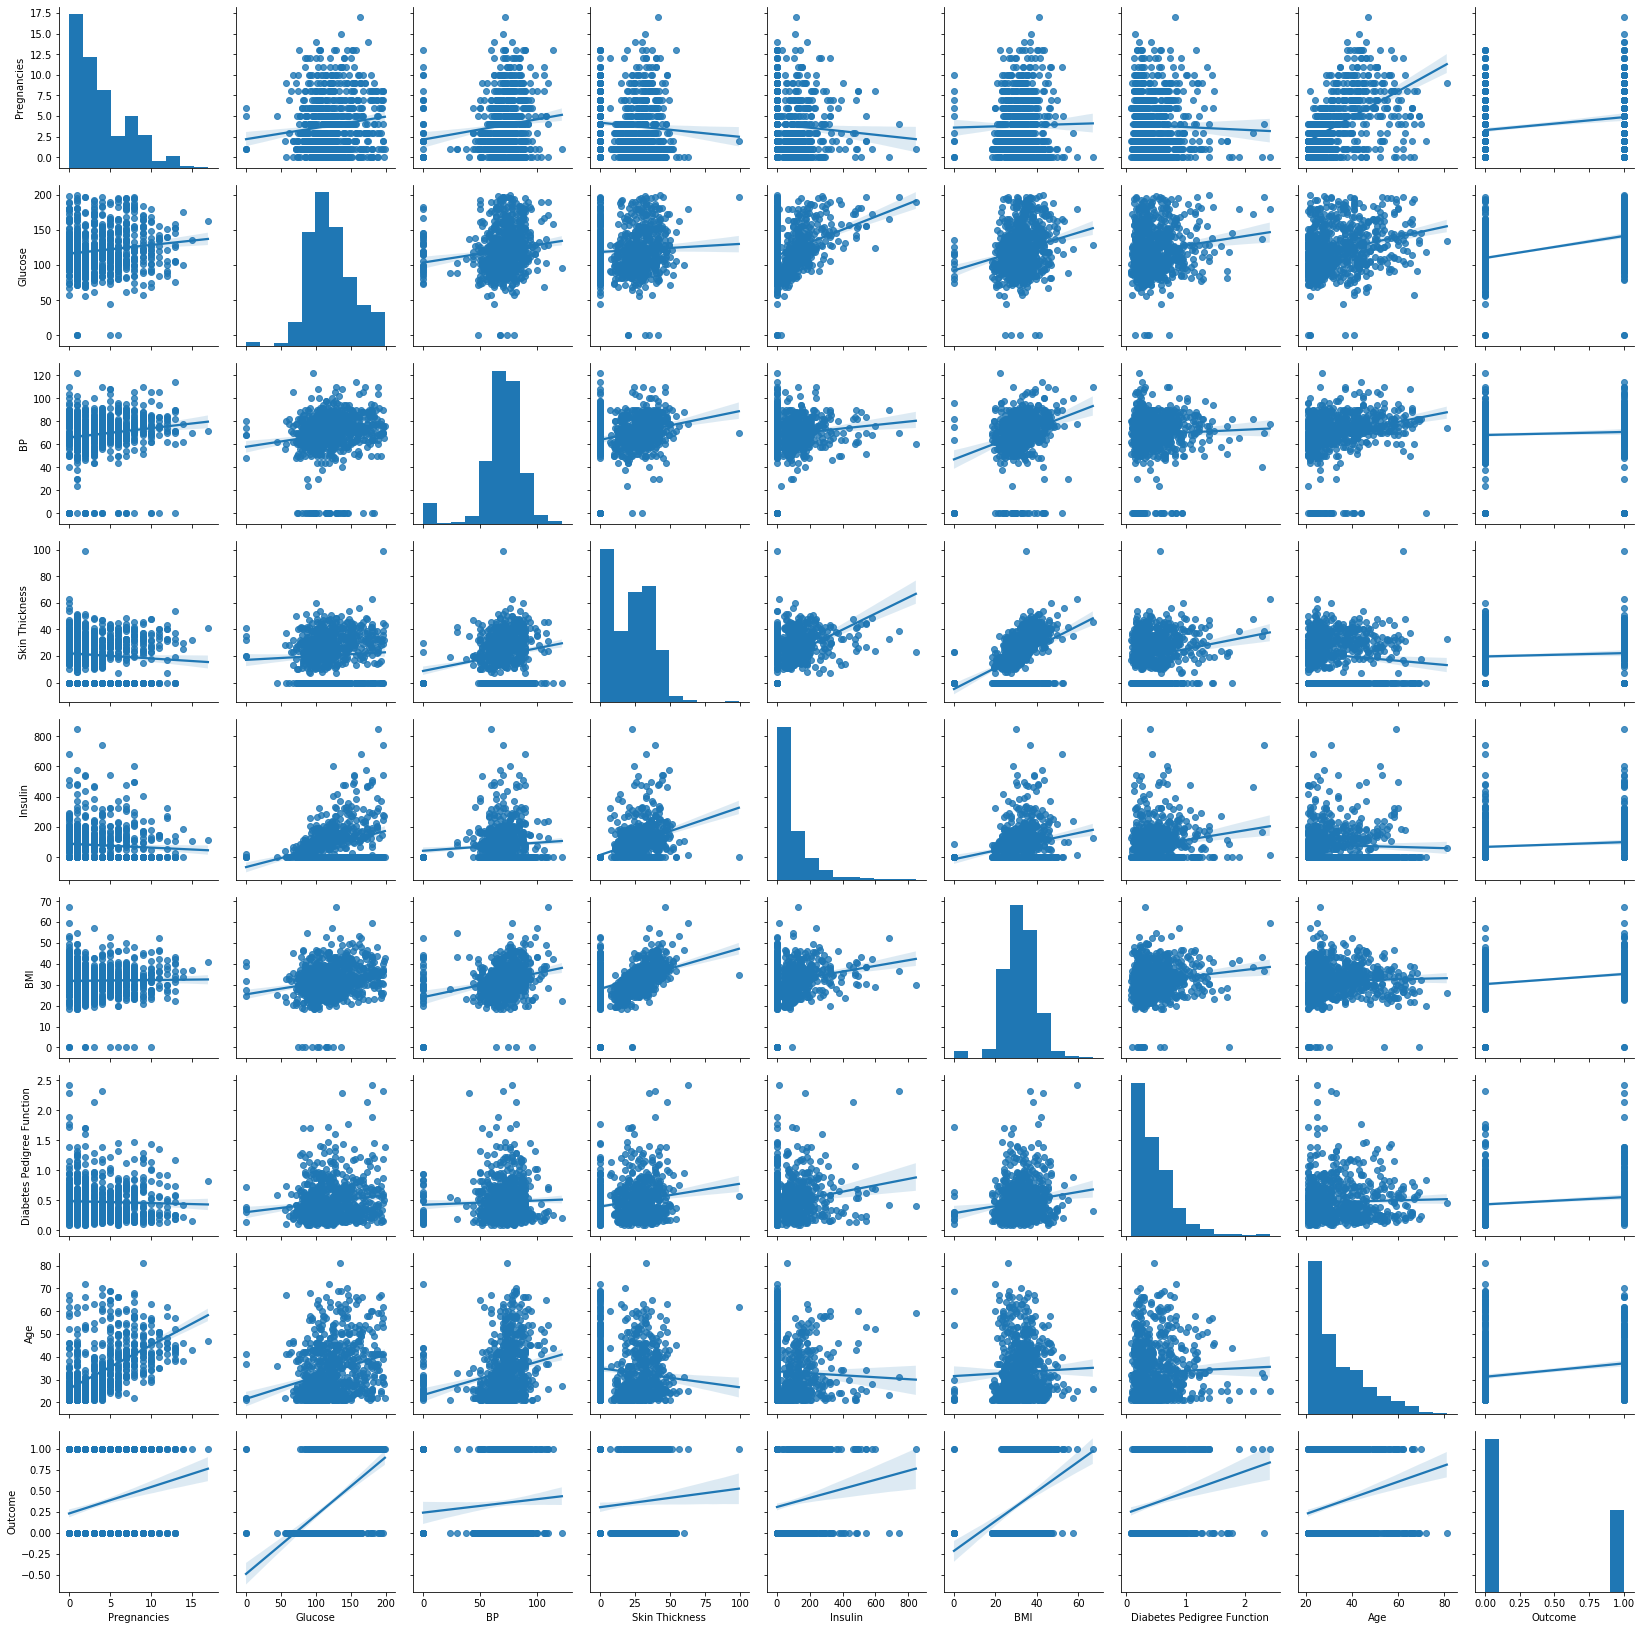

In [21]:
sns.pairplot(diabetes, kind='reg')

Compared to the plot produced by Matplotlib this plot is a lot more visually appealing

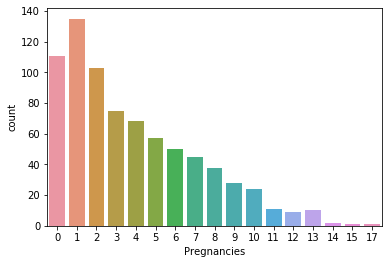

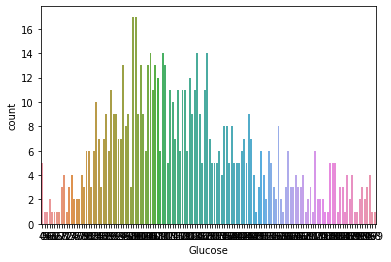

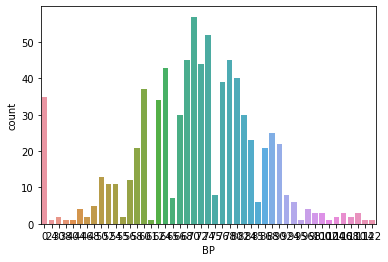

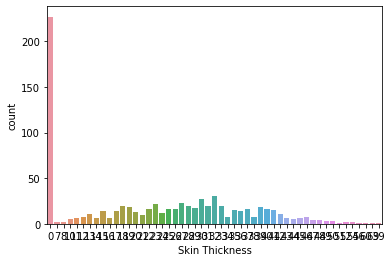

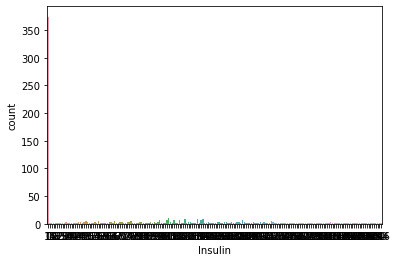

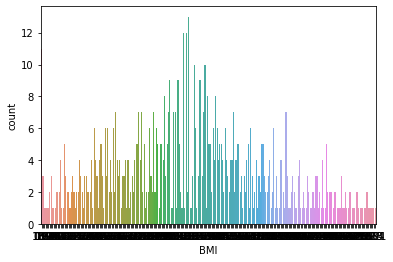

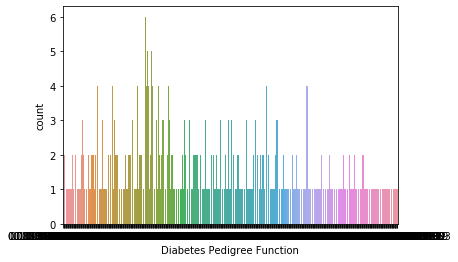

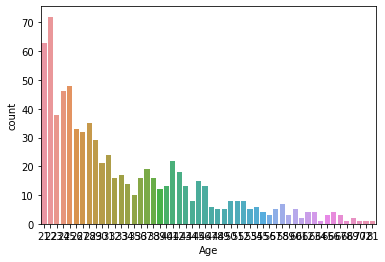

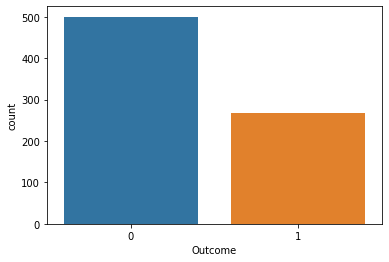

In [22]:
db1 = diabetes.select_dtypes([np.int, np.float])

for i, col in enumerate(db1.columns):
    plt.figure(i)
    sns.countplot(x=col, data=db1)

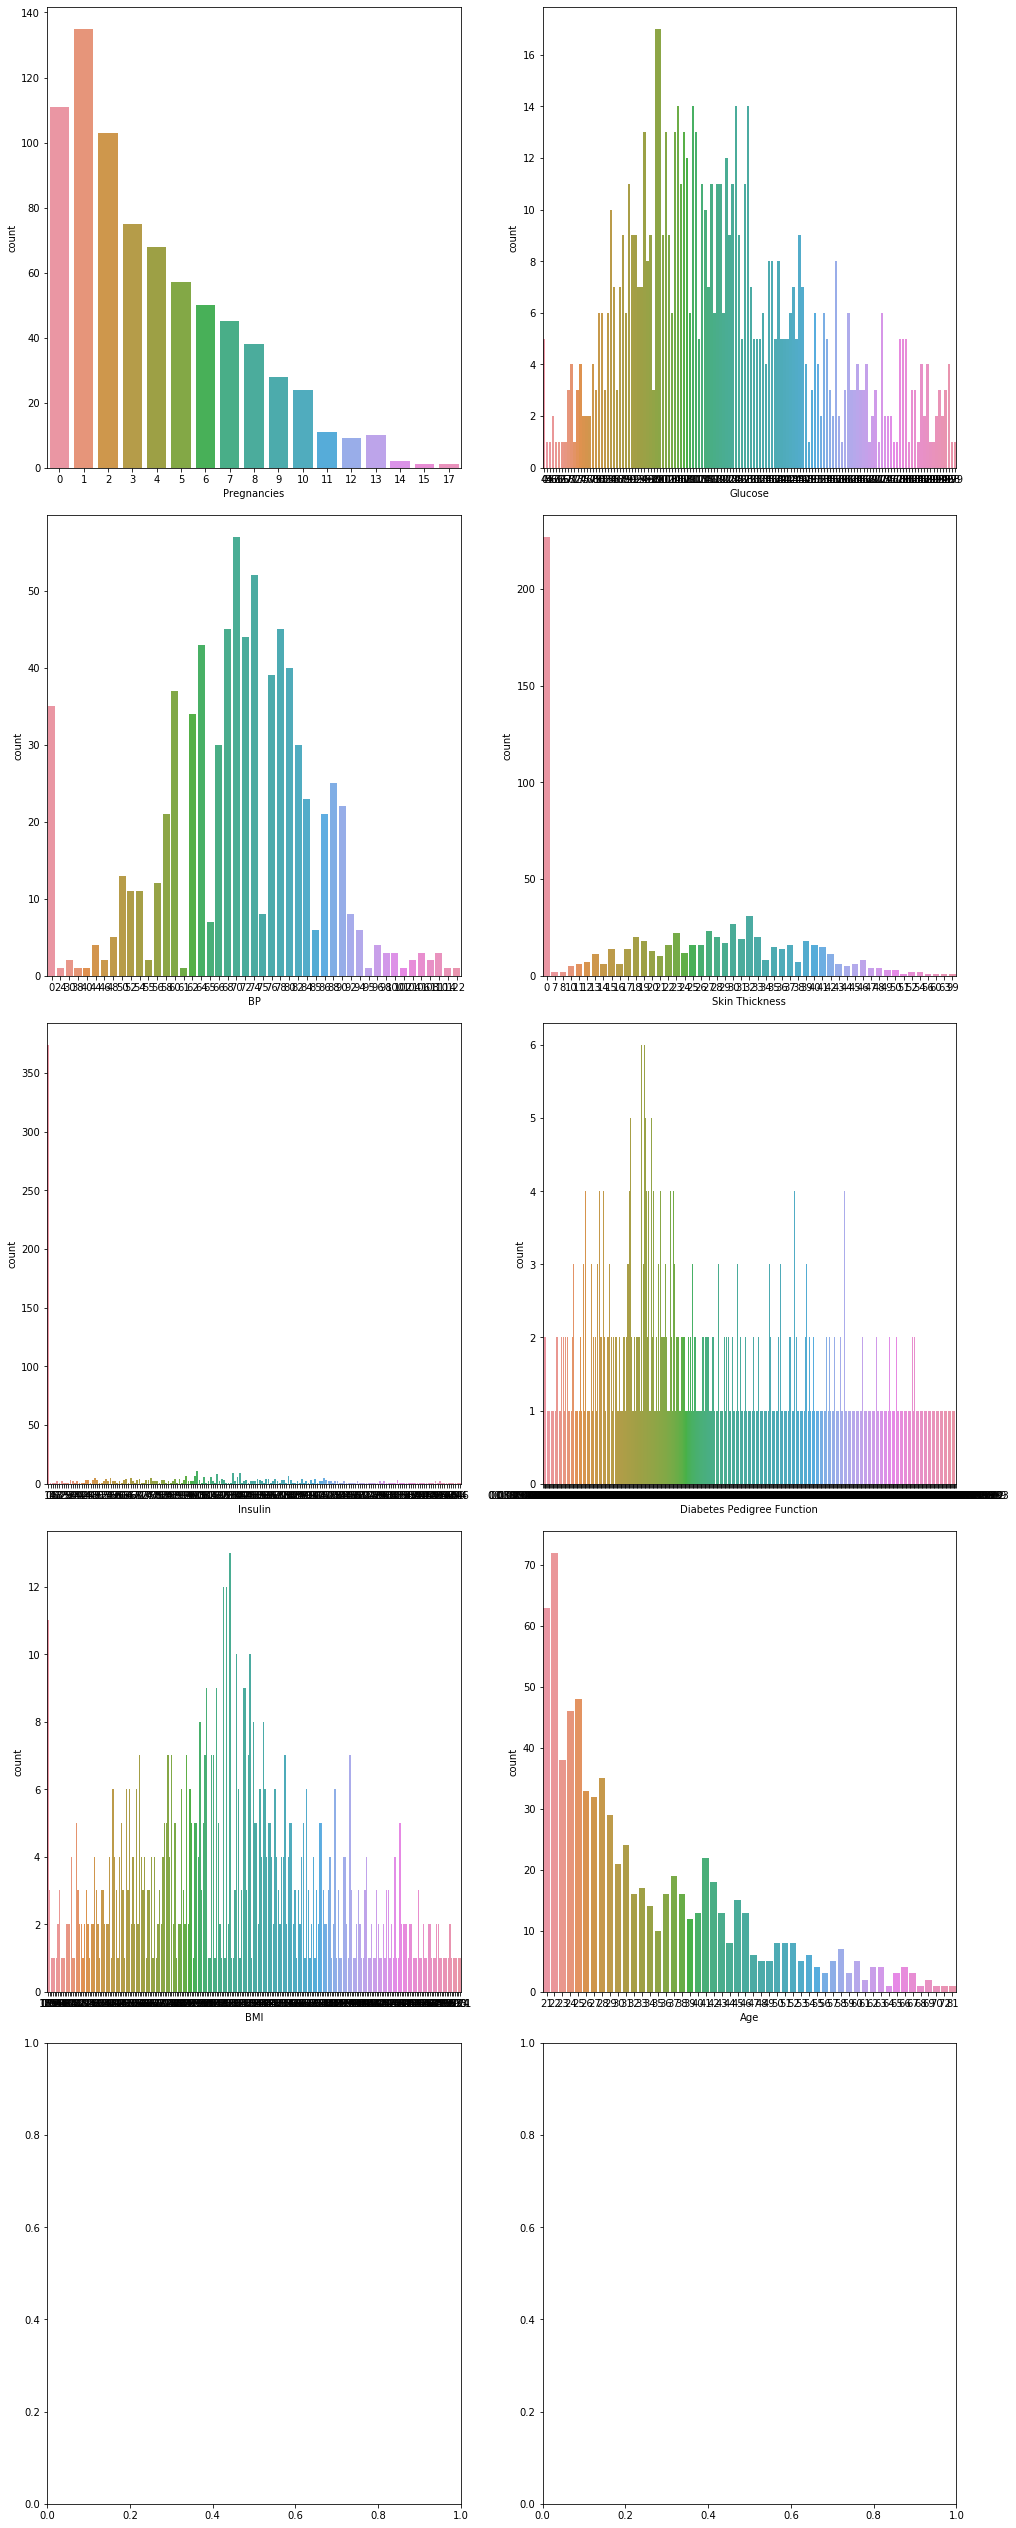

In [23]:
#We are going to produce the same visualisation using an alternative method

categorical_vars = ['Pregnancies', 'Glucose', 'BP', 'Skin Thickness', 'Insulin',
                    'Diabetes Pedigree Function','BMI','Age']

num_plots = len(categorical_vars)
totalcols = 2
totalrows = num_plots//totalcols + 1

fig, axs  = plt.subplots(nrows=totalrows, ncols=totalcols,
                         figsize=(7*totalcols, 7*totalrows), constrained_layout=True)

for i, var in enumerate(categorical_vars):
    row = i//totalcols
    pos = i % totalcols
    
    plot = sns.countplot(x=var, data=diabetes, ax=axs[row][pos])

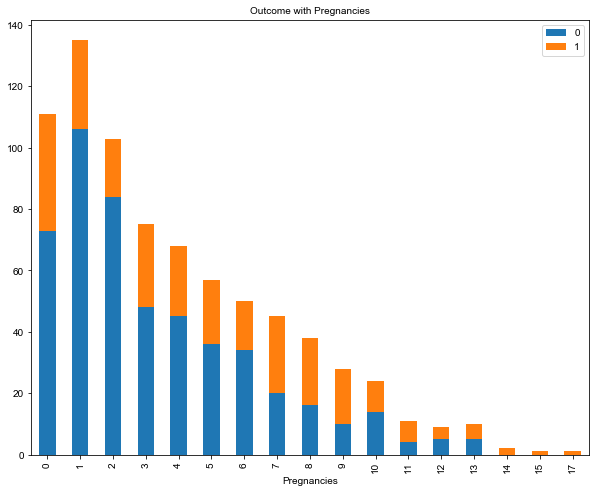

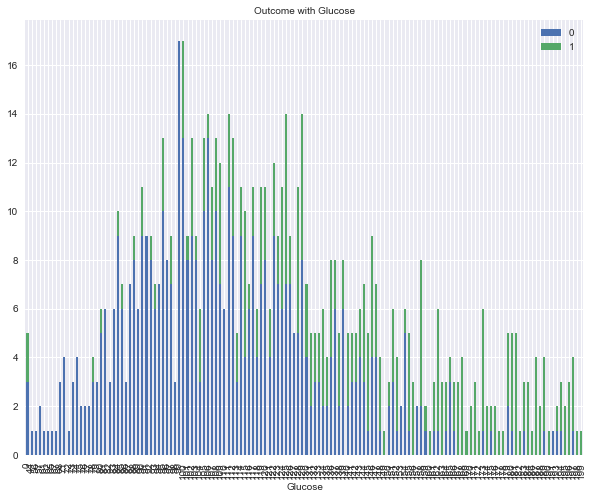

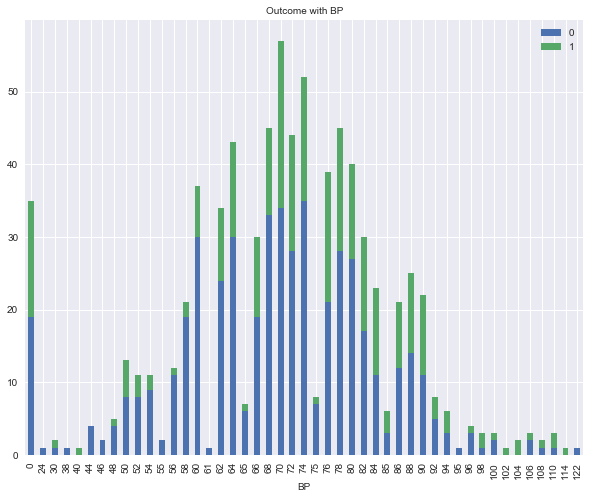

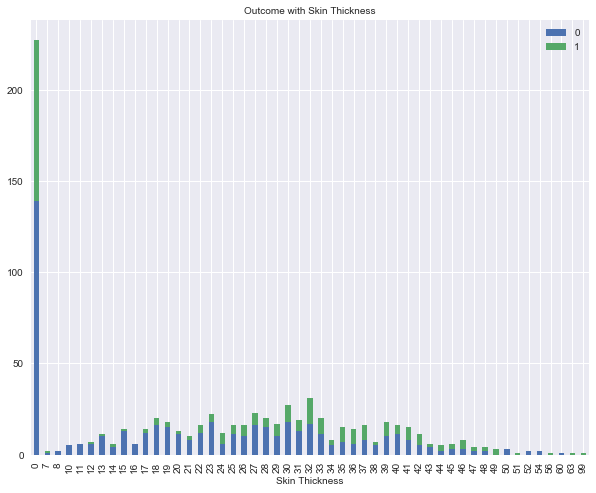

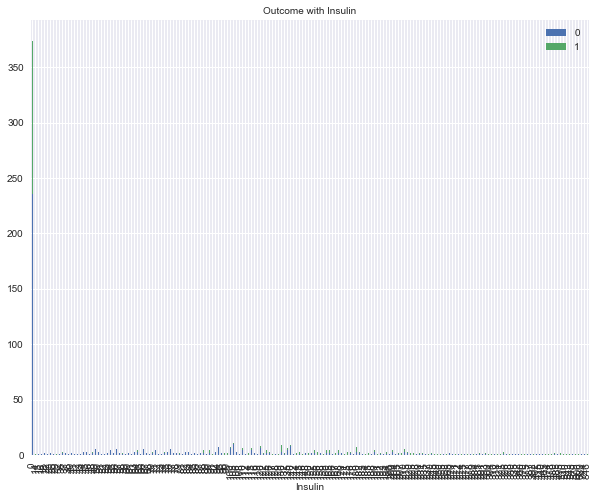

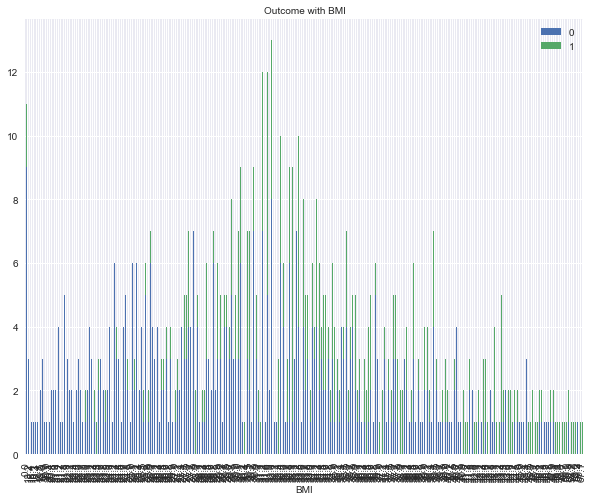

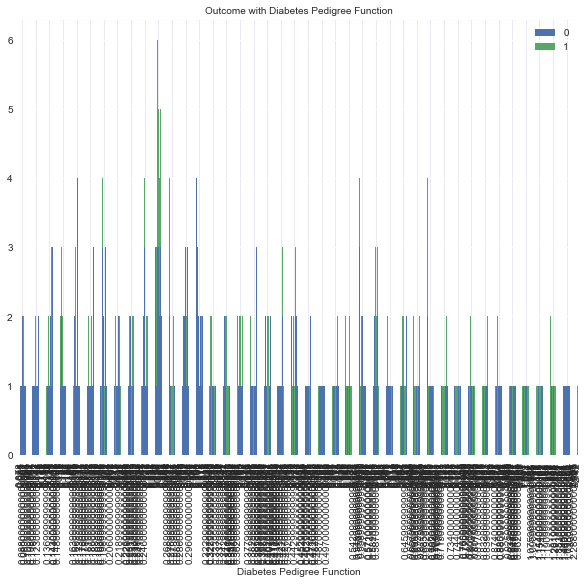

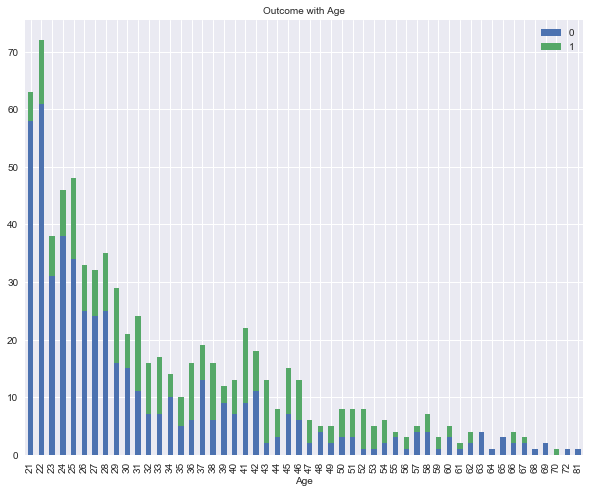

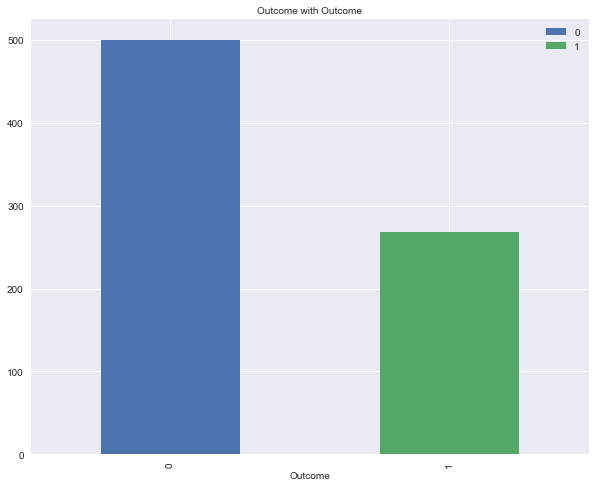

In [24]:
#We are going to loop through every column against our target variable which is the outcome, if patient has diabetes or not

#Converting our colums into a list

list_index = list(diabetes.columns)

for i in list_index: 
    diabetes.groupby([i,'Outcome']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,8))
    plt.title(f'Outcome with {i}', fontsize = 10)
    plt.legend(fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
              
    plt.xlabel(i,fontsize=10)
    plt.style.use('seaborn')

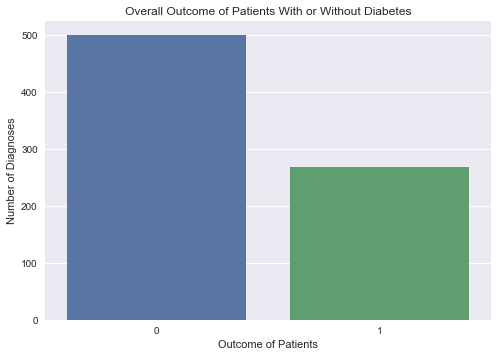

In [25]:
#We are going to a value counts on our Outcome to see if there is a major class difference that may affect our results

outcome_count = diabetes['Outcome'].value_counts()
sns.barplot(outcome_count.index, outcome_count.values)

plt.title('Overall Outcome of Patients With or Without Diabetes')
plt.xlabel('Outcome of Patients')
plt.ylabel('Number of Diagnoses')

plt.style.use('seaborn')
plt.show() 

# Modelling

In [26]:
from sklearn.model_selection import train_test_split

## Creating the Train-Test Split

In [27]:
#Separating out test data
y = diabetes['Outcome']
X = diabetes[['Pregnancies', 'Glucose', 'BP', 'Skin Thickness', 'Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age']]

#Creating our train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [28]:
print(f'My training data shape is {X_train.shape}')
print(f'My final test data shape is {X_test.shape}')
print(f'My training set dependant data shape is {y_train.shape}')
print(f'My test set dependant shape is {y_test.shape}')

My training data shape is (614, 8)
My final test data shape is (154, 8)
My training set dependant data shape is (614,)
My test set dependant shape is (154,)


## Splitting the Train Data into Training and Validation Datasets

In [29]:
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=50)

## Scaling the dataset using Standard Scaler

In [30]:
#We are going to standardize our variables

from sklearn.preprocessing import StandardScaler

#Instantiate the class
ss = StandardScaler()

#Fit the scaler on the training dataset
ss.fit(X_train_v)

#Transform all the datasets
X_train_v = ss.transform(X_train_v)
X_val = ss.transform(X_val)

X_test = ss.transform(X_test)

## Baseline Model - Gaussian Naive Bayes

The Naive Bayes formula is based on the naive assumption of conditional independence between every pair of features given the value of the class variable. While it is a decent classifier, Naive Bayes is not good as estimating, therefore the results given from predict proba are not very viable.  

Applied to our case scenario of a patient having diabetes, a researcher may examine patients to see whether they have diabetes. If they are independent and uncorrelated from one another, one can then examine the conditional probability of these metrics and apply Bayes' theoreom to determine a relative probability of having the disease or not. 

These probabilities can be combined give an overall confidence as to whether the patient has diabetes given the information.

In [31]:
from sklearn.naive_bayes import GaussianNB

#Instantiate the class
model_gnb = GaussianNB()

In [32]:
#Fitting the model to the training data set

model_gnb.fit(X_train_v, y_train_v)

GaussianNB(priors=None, var_smoothing=1e-09)

## Measuring the Model Accuracy

In [33]:
from sklearn.metrics import accuracy_score, roc_auc_score

### Training

In [34]:
y_train_pred = model_gnb.predict_proba(X_train_v)[:,1]

print('ROC_AUC score for the training data set is = ',  roc_auc_score(y_train_v, y_train_pred))

ROC_AUC score for the training data set is =  0.8060377076163399


### Validation

In [35]:
y_val_pred = model_gnb.predict(X_val)

print('Accuracy of validation data set is = ', accuracy_score(y_val, y_val_pred))

print('ROC_AUC score of validation data set is = ', roc_auc_score(y_val, y_val_pred))

Accuracy of validation data set is =  0.7642276422764228
ROC_AUC score of validation data set is =  0.7572602739726029


## Logistic Regression

We use Logistic Regression as our first model because of its capability to describe data and to explain the relationship between one dependant binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model_log = LogisticRegression(penalty='l2', fit_intercept=True, solver='lbfgs', random_state = 45)
model_log.fit(X_train_v, y_train_v)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=45, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Training

In [38]:
y_train_pred_log = model_log.predict_proba(X_train_v)[:,1]

In [39]:
print("ROC_AUC of training model = ", roc_auc_score(y_train_v, y_train_pred_log))

ROC_AUC of training model =  0.8251346700583571


### Validation

In [40]:
y_val_pred_log = model_log.predict(X_val)


print("Accuracy of validation model = ", accuracy_score(y_val,y_val_pred_log))

print("ROC_AUC of validation model = ", roc_auc_score(y_val, y_val_pred_log))

Accuracy of validation model =  0.7886178861788617
ROC_AUC of validation model =  0.7683561643835616


We can see the validation score on Logistic regression is better than that produced by the Gaussian Naive Bayes method.

## Hyperparameter Tuning the Logistic Regression Model

## Decision Tree Classifier

How Decisision Trees work is as a classifer they partition the sample space as efficiently as possible into sets with similar data points until you get close to a set with similar data points and can predict the value for new data points. 

We will use the graph viz library to generate a visualization of the resulting decision tree. 

We will also tweak our hyperparameters, in particular the maximum depth and minimal leaf samples. 

We will look at pruning strategies to avoid overfitting of data

In [41]:
#Importing the necessary modules

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from pydotplus import graph_from_dot_data

In [42]:
#Training the tree

model_dt = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=4, random_state=46)

#Fitting the tree

model_dt.fit(X_train_v, y_train_v)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=46, splitter='best')

### Train

In [43]:
y_train_pred_dt = model_dt.predict_proba(X_train_v)[:,1]

In [44]:
print("ROC_AUC of model =", roc_auc_score(y_train_v, y_train_pred_dt))

ROC_AUC of model = 0.7701163399670807


We have achieved a score of 77% on our training data, now let's see our validation data.

### Validation

In [45]:
y_val_pred_dt = model_dt.predict_proba(X_val)[:,1]

print("ROC_AUC of model:", roc_auc_score(y_val,y_val_pred_dt))

ROC_AUC of model: 0.746986301369863


A score of 74.7% isn't too far off our training data and there isn't evidence of overfitting (a score indicating >90%) 

### Visualising the Decision Tree

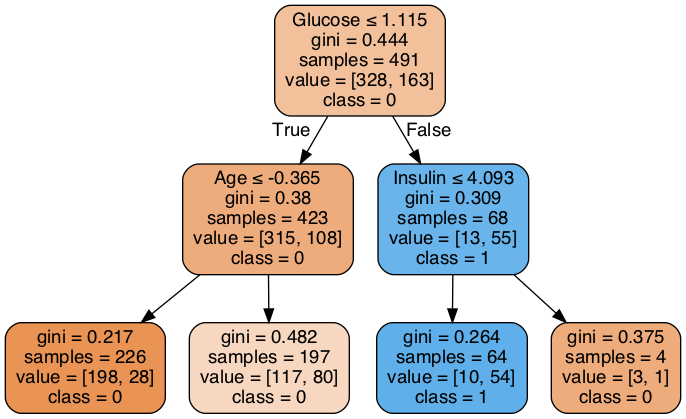

In [46]:
# Create DOT data
dot_data = export_graphviz(model_dt, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


## Hyperparameter Tuning of the Decision Tree

In [47]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [48]:
skf = StratifiedKFold(n_splits=7, random_state=90, shuffle=True)

#Establishing the parameters 
param_grid = {'C':[1,10,50,100]}


In [49]:
#Establishing the parameter grid 

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : [1,2,5,10],
    'min_samples_split' : [1,5,10,20]
}

In [50]:
optmodel_dt = GridSearchCV(DecisionTreeClassifier(random_state=48, class_weight='balanced'),
                          param_grid_dt,
                          cv=skf,
                          scoring='roc_auc',
                          return_train_score=True)

#Fitting the model on the training dataset 

optmodel_dt.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=90, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=48,
                                              splitter='best'),
  

In [51]:
pd.DataFrame(optmodel_dt.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.002643,0.000482,0.000000,0.000000,gini,1,1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",NaN,NaN,...,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002288,0.000159,0.001575,0.000321,gini,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.729885,0.636782,...,18,0.710343,0.725828,0.704015,0.711123,0.710804,0.702289,0.727403,0.713115,0.009124
2,0.002088,0.000074,0.001265,0.000024,gini,1,10,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.729885,0.636782,...,18,0.710343,0.725828,0.704015,0.711123,0.710804,0.702289,0.727403,0.713115,0.009124
3,0.002053,0.000063,0.001264,0.000047,gini,1,20,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.729885,0.636782,...,18,0.710343,0.725828,0.704015,0.711123,0.710804,0.702289,0.727403,0.713115,0.009124
4,0.001760,0.000058,0.000000,0.000000,gini,2,1,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",NaN,NaN,...,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.002237,0.000009,0.001298,0.000054,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.780460,0.792529,...,5,0.804521,0.803088,0.796791,0.799978,0.801223,0.803112,0.808187,0.802414,0.003331
6,0.002166,0.000034,0.001321,0.000048,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.780460,0.792529,...,5,0.804521,0.803088,0.796791,0.799978,0.801223,0.803112,0.808187,0.802414,0.003331
7,0.002155,0.000042,0.001302,0.000065,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.780460,0.792529,...,5,0.804521,0.803088,0.796791,0.799978,0.801223,0.803112,0.808187,0.802414,0.003331
8,0.001740,0.000046,0.000000,0.000000,gini,5,1,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",NaN,NaN,...,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.002679,0.000095,0.001310,0.000056,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.802874,0.718103,...,4,0.931224,0.926126,0.922071,0.927837,0.920601,0.913791,0.924331,0.923712,0.005216


In [52]:
#Obtaining the best parameters for our result

print("The value of the optimised hyperparameters for our model was:\n", optmodel_dt.best_params_)

The value of the optimised hyperparameters for our model was:
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}


In [53]:
#Printing the best score of the hyperparameter for our tuned model

print("The value of the score for hyperparameter optimised model was:\n", optmodel_dt.best_score_)

The value of the score for hyperparameter optimised model was:
 0.7988002310187781


After hyperparameter tuning we can see we have achieved a score of 79.9%, an improvement of 5%

## Hyperparameter Tuning part 2

Let's see if we can get the validation score to improve  

In [54]:
#Establishing the parameter grid

param_grid_dt_2 = {'criterion':['gini'],
                   'max_depth':[1,2,3,4,5],
                   'min_samples_split':[1,2,3,4,5,6,7,8,9,10],
                   'max_features': [2,4,6,8,10,12,14]
                  }

In [55]:
#Increasing the number of folds in our splits 

skf_2 = StratifiedKFold(n_splits=9, random_state=100, shuffle=True)

In [56]:
optmodel_dt_2 = GridSearchCV(DecisionTreeClassifier(random_state = 54, class_weight='balanced'),
                            param_grid_dt_2,
                            cv=skf_2,
                            scoring='roc_auc',
                            return_train_score=True)

In [57]:
#Fitting the model 
optmodel_dt_2.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=9, random_state=100, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=54,
                                              splitter='best'),
 

In [58]:
pd.DataFrame(optmodel_dt_2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,...,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,mean_train_score,std_train_score
0,0.002037,0.000216,0.000000,0.000000,gini,1,2,1,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002349,0.000283,0.001595,0.000461,gini,1,2,2,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.636111,...,0.712874,0.720801,0.710452,0.712907,0.710707,0.710707,0.711018,0.705727,0.713118,0.005077
2,0.002250,0.000127,0.001498,0.000165,gini,1,2,3,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.636111,...,0.712874,0.720801,0.710452,0.712907,0.710707,0.710707,0.711018,0.705727,0.713118,0.005077
3,0.002051,0.000097,0.001332,0.000059,gini,1,2,4,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.636111,...,0.712874,0.720801,0.710452,0.712907,0.710707,0.710707,0.711018,0.705727,0.713118,0.005077
4,0.001973,0.000097,0.001314,0.000056,gini,1,2,5,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.636111,...,0.712874,0.720801,0.710452,0.712907,0.710707,0.710707,0.711018,0.705727,0.713118,0.005077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.001730,0.000046,0.000000,0.000000,gini,5,14,6,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,0.001719,0.000050,0.000000,0.000000,gini,5,14,7,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,0.001729,0.000055,0.000000,0.000000,gini,5,14,8,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,0.001777,0.000101,0.000000,0.000000,gini,5,14,9,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
#Obtaining the best parameters for the result

print("The value of the optimised hyperparameters for our model was:\n", optmodel_dt_2.best_params_)

The value of the optimised hyperparameters for our model was:
 {'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'min_samples_split': 2}


In [60]:
#Obtaining the best score for the result for our second tuned model

print("The score achieved for the best parameter in our model was:\n", optmodel_dt_2.best_score_)

The score achieved for the best parameter in our model was:
 0.8173180577920917


81.7% score achieved. A fantastic result and another improvement on what we produced in our first hyperparameter tuned model.

## Evaluation

### Evaluation of the Test Data

In [61]:
from sklearn.metrics import roc_curve, auc

In [62]:
#Testing on test data

y_hat_DT = optmodel_dt_2.predict_proba(X_test)[:,1]
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_hat_DT)

In [63]:
#Find the ROC score on test data

roc_auc_score(y_test, y_hat_DT)

0.5

The ROC Curve gives us a trade of the tradeoff between the false positive and true positive rate. The area under the curve (AUC) gives us a singular metric to compare these. An AUC of 1 means perfect classifier and an AUC of 0.5 means 50% 

## ROC Curve

### Test Dataset

Test AUC: 0.5



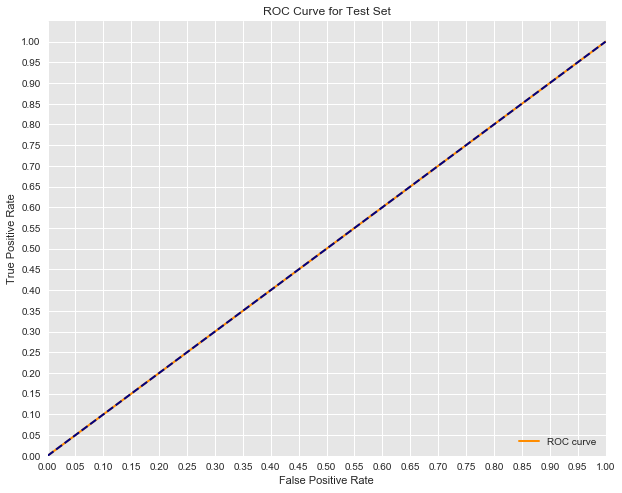

In [75]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

#ROC curve for test set
plt.figure(figsize=(10,8))
lw = 2

plt.plot(fpr_test, tpr_test, color='darkorange',
        lw=lw, label='ROC curve')
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')

plt.legend(loc='lower right')
print('Test AUC: {}'.format(auc(fpr_test,tpr_test)))
print('')
plt.show()


## Threshold Selection and Confusion Matrix

We are going to use a prevalence figure of 0.094 which means 9.4% of Americans have diabetes according to a CDC figure. 

#### True Positives

Number of times the model predicted the patient would have diabetes and they did. 

#### True Negatives

Number of times the model predicted the customer doesn't have diabetes and they didn't

#### False Positives

Number of times the model predicted the customer doesn't have diabetes and they don't

#### False Negatives 

Number of times the model predicted the customer doesn't have diabetes and they do

In [83]:
from sklearn.metrics import confusion_matrix